In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from matplotlib import cm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import urllib2
import json
def viewer(model, i = None ,batch = None, record = None, host = "127.0.0.1", port = 8888):
  address = "http://%s:%d" % (host,port)
  path = address + "/model/%s" % model
  if i is not None:
    path = path+"/%d" % i
    if batch is not None:
      path = path+"?batch=%d" % batch
      if record is not None:
        path = path+"&ind=%d" % record
  return json.loads(urllib2.urlopen(path).read())

In [3]:
def getValues(jsonInput):
  x = np.array(jsonInput['x'])
  y = np.array(jsonInput['y'])
  pred = np.array(jsonInput['pred'])
  return x,y,pred

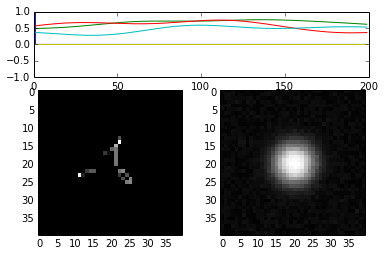

In [67]:
model = 305
dal = np.array(viewer(model)['indecies'])
step = dal[0]

@interact(batch = [1,viewer(model, i = step)['batch_count']],
          record = [1,viewer(model, i = step,batch = 1)['batch_length']],
          i = (dal[0],dal[-1],step))
def plot(i,batch,record):
  x, y, pred= getValues(viewer(model, i = i, batch = batch, record = record))
  ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
  inp = x[:-3].reshape((x.shape[0]-3)/6,6)
  ax1.plot(inp)
  ax1.set_ylim(-1,1)
  ax2 = plt.subplot2grid((3,2), (1,0), colspan=1,rowspan=2)
  ax2.imshow(y.reshape(np.sqrt(y.shape[0]),np.sqrt(y.shape[0])),cmap = cm.Greys_r,interpolation = 'nearest')
  #ax2.axis('off')
  ax3 = plt.subplot2grid((3,2), (1,1), colspan=1,rowspan=2)
  ax3.imshow(pred.reshape(np.sqrt(pred.shape[0]),np.sqrt(pred.shape[0])),cmap = cm.Greys_r,interpolation = 'nearest')
  #ax3.axis('off')